# QCTO - Workplace Module

### Project Title: Water pollution levels
#### Done By: Jeremy Africa
#### https://github.com/Jeremy809/Workplace



© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

Water Quality Analysis Project

1. Problem Statement:

Access to clean and safe water is a fundamental human need, yet water pollution continues to pose a serious threat to ecosystems and human health worldwide. Industrial discharges, agricultural runoff, and domestic waste contribute significantly to the degradation of river water quality.

The dataset River water parameters (1).csv contains various physicochemical parameters (such as pH, turbidity, dissolved oxygen, conductivity, hardness, nitrate, and temperature) collected from different sampling locations or times. However, without proper analysis, it is difficult to understand how these parameters interact and whether the water quality meets acceptable environmental and health standards.

This project aims to analyze river water quality using data-driven techniques to identify patterns, detect possible contamination, and evaluate the suitability of water for different uses (e.g., drinking, agriculture, and aquatic life).


2. Key problems to address include:

Identifying trends and correlations between different water quality parameters.

Detecting potential pollution or anomaly patterns in the river.

Classifying the overall water quality (good, moderate, or poor) based on key indicators.

Providing actionable insights for environmental monitoring and policy recommendations.

3. Out of Scope

Real-time monitoring or sensor integration (focus is on offline data analysis).

Detailed chemical modeling of pollutant behavior beyond dataset parameters.

Prediction of future water quality trends (only historical analysis).

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import seaborn as sns

# Machine Learning (Modeling & Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    silhouette_score, mean_squared_error, precision_score, recall_score, f1_score
)
from sklearn.pipeline import Pipeline

# Natural Language Processing (if needed)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Statistical Analysis
from scipy import stats

# Visualization Enhancements (optional)
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

# Warnings and Display Options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Miscellaneous (if needed)
from collections import Counter
from itertools import combinations

# Save the model
import joblib   


    


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [2]:
"""
The dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. 
The data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. 
Standard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.
The dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. 

Each record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. 
The scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifying pollution indicators, and supporting environmental monitoring and management studies.
"""

'\nThe dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. \nThe data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. \nStandard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.\nThe dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. \n\nEach record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. \nThe scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifyin

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
url = "https://raw.githubusercontent.com/Jeremy809/Workplace/refs/heads/main/River%20water%20parameters.csv"
df = pd.read_csv(url)
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,NaN,NaN,147.00,BLANDA,156.00
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,NaN,41.20,94.00,BLANDA,78.00
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,NaN,38.90,86.00,BLANDA,82.00
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,NaN,30.70,200.00,SEMIDURA,117.00
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,NaN,25.60,196.00,SEMIDURA,117.00


In [4]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe().T)

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-nu

,count,mean,std,min,25%,50%,75%,max
Ambient temperature (°C),219.00,17.64,5.16,10.40,13.80,17.00,20.00,30.50
Ambient humidity,219.00,0.56,0.17,0.19,0.47,0.54,0.69,0.87
Sample temperature (°C),219.00,19.59,3.88,12.80,16.80,19.30,22.10,28.10
pH,219.00,8.03,0.29,7.20,7.90,8.10,8.20,8.70
EC\n(µS/cm),219.00,1264.57,273.32,200.00,1075.00,1330.00,1470.00,1710.00
TDS\n(mg/L),219.00,624.25,135.54,140.00,530.00,660.00,725.00,850.00
TSS\n(mL sed/L),213.00,61.02,87.08,0.10,30.00,48.00,66.00,650.00
DO\n(mg/L),219.00,2.62,1.96,0.00,1.17,1.87,4.00,9.12
Level (cm),180.00,38.28,12.53,10.00,30.00,35.00,48.00,70.00
Turbidity (NTU),218.00,144.95,234.59,1.06,27.50,59.25,136.00,1000.00



--- Missing Values ---
Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [5]:
# -----------------------------
# Standardize Column Names
# -----------------------------
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)  # replace special chars
      .str.replace("__+", "_", regex=True)     # replace multiple underscores
      .str.rstrip('_')                         # remove trailing underscores
)
print("Clean column names:")
print(df.columns.tolist())

# -----------------------------
# Handle Missing Values
# -----------------------------
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isna().sum())

# -----------------------------
# Ensure numeric columns are correct type
# -----------------------------
for col in ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# -----------------------------
# Hardness Level Classification
# -----------------------------
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']
df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# -----------------------------
# pH Category
# -----------------------------
def classify_ph(ph):
    if ph < 7:
        return "Acidic (Not ideal)"
    elif 7 <= ph <= 8.5:
        return "Neutral (Safe)"
    else:
        return "Alkaline (Caution)"

df['ph_category'] = df['ph'].apply(classify_ph)

# -----------------------------
# Turbidity Category
# -----------------------------
def classify_turbidity(turb):
    if turb <= 5:
        return "Clear (Good)"
    elif 5 < turb <= 100:
        return "Some Suspended Particles (Moderate)"
    else:
        return "Very Cloudy (Poor)"

df['turbidity_category'] = df['turbidity_ntu'].apply(classify_turbidity)

# -----------------------------
# Overall Water Quality
# -----------------------------
def overall_quality(row):
    categories = [row['ph_category'], row['hardness_level'], row['turbidity_category']]
    for cat in categories:
        if any(x in str(cat) for x in ["Not ideal", "Moderate", "Poor", "Caution", "Hard", "Very Hard"]):
            return "Requires Treatment"
    return "Safe"

df['water_quality_overall'] = df.apply(overall_quality, axis=1)

# -----------------------------
# Save Cleaned Dataset
# -----------------------------
df.to_csv("River_water_parameters_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved with water quality classifications.")
print(df.columns.tolist())


Clean column names:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l']

Missing values after cleaning:
date_dd_mm_yyyy            0
time_24_hrs_xx_xx          0
sampling_point             0
ambient_temperature_c      0
ambient_humidity           0
sample_temperature_c       0
ph                         0
ec_µs_cm                   0
tds_mg_l                   0
tss_ml_sed_l               0
do_mg_l                    0
level_cm                   0
turbidity_ntu              0
hardness_mg_caco3_l        0
hardness_classification    0
total_cl_mg_cl_l           0
dtype: int64

✅ Cleaned dataset saved with water quality classifications.
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c'

In [6]:
# Water Quality Summary per Sample
for idx, row in df.iterrows():
    print(f"Sampling Point: {row['sampling_point']}")
    print(f"Date & Time   : {row['date_dd_mm_yyyy']} {row['time_24_hrs_xx_xx']}")
    print(f"pH            : {row['ph']} → {row['ph_category']}")
    print(f"Hardness      : {row['hardness_mg_caco3_l']} mg/L → {row['hardness_level']}")
    print(f"Turbidity     : {row['turbidity_ntu']} NTU → {row['turbidity_category']}")
    print(f"Overall Water Quality: {row['water_quality_overall']}")
    print("-" * 50)



Sampling Point: Puente Bilbao
Date & Time   : 09/05/2023 14:15
pH            : 8.3 → Neutral (Safe)
Hardness      : 147.0 mg/L → Hard
Turbidity     : 59.25 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Puente Bilbao
Date & Time   : 14/06/2023 14:30
pH            : 8.1 → Neutral (Safe)
Hardness      : 94.0 mg/L → Moderately Hard
Turbidity     : 41.2 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Puente Bilbao
Date & Time   : 14/06/2023 14:30
pH            : 8.2 → Neutral (Safe)
Hardness      : 86.0 mg/L → Moderately Hard
Turbidity     : 38.9 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Arroyo_Las Torres
Date & Time   : 14/06/2023 15:00
pH            : 8.3 → Neutral (Safe)
Hardn

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [7]:
# Create pH category separately
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic"
    elif 6.5 <= ph <= 8.5:
        return "Neutral"
    else:
        return "Alkaline"

df['pH_Category'] = df['ph'].apply(classify_ph)
print(df[['ph', 'pH_Category']].head())


    ph pH_Category
0 8.30     Neutral
1 8.10     Neutral
2 8.20     Neutral
3 8.30     Neutral
4 8.50     Neutral


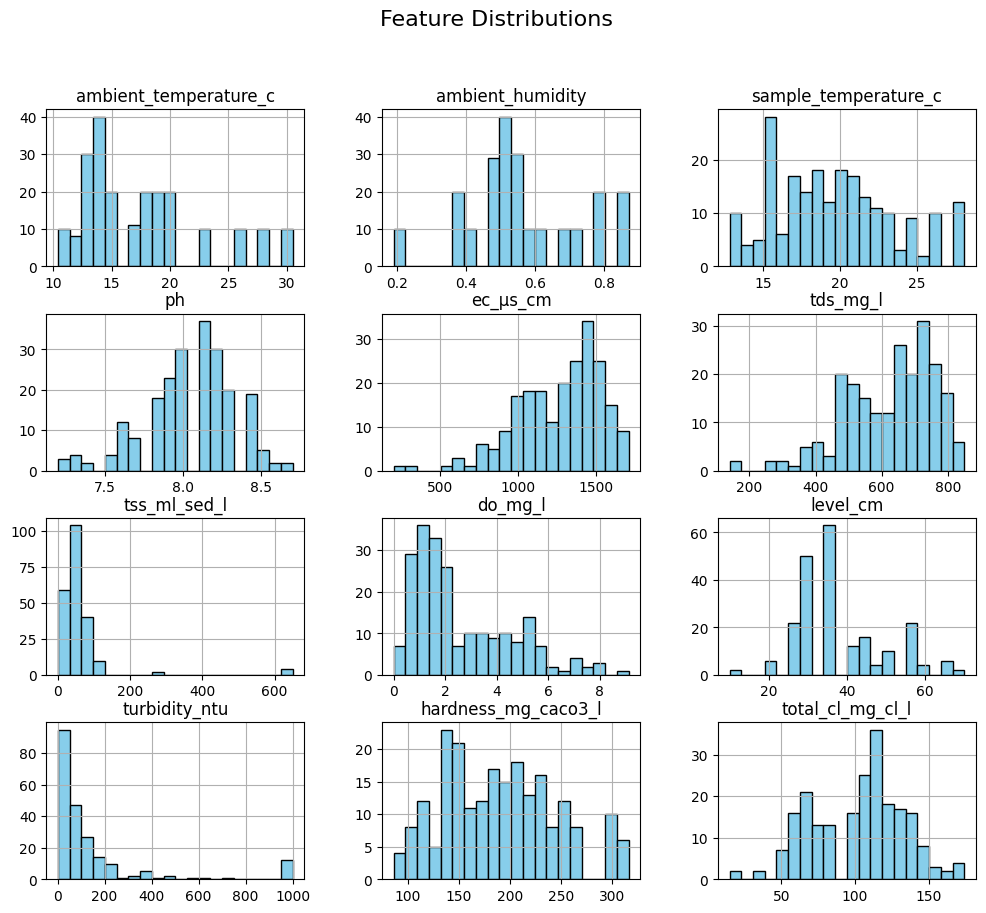

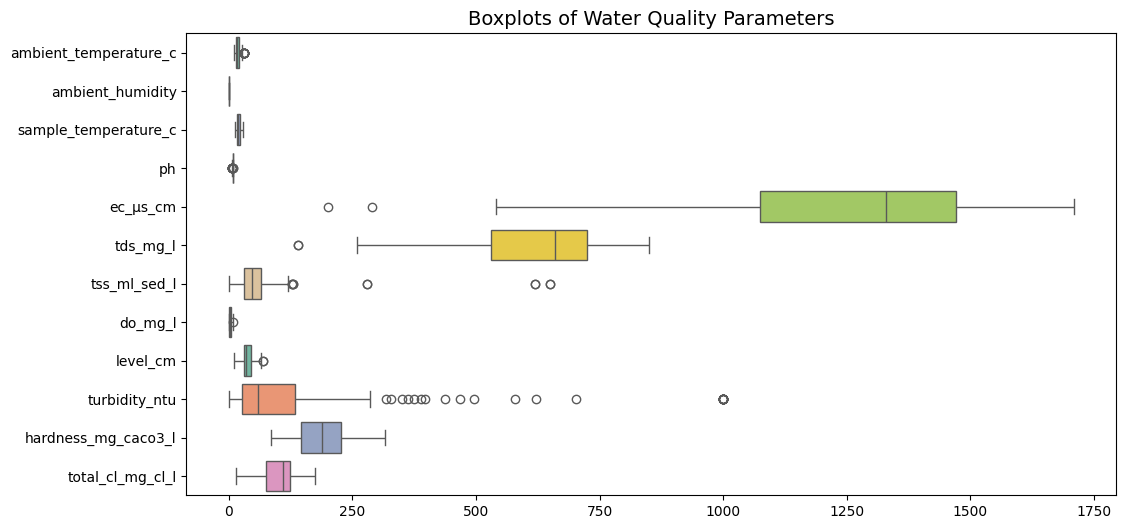

In [8]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Water Quality Parameters", fontsize=14)
plt.show()


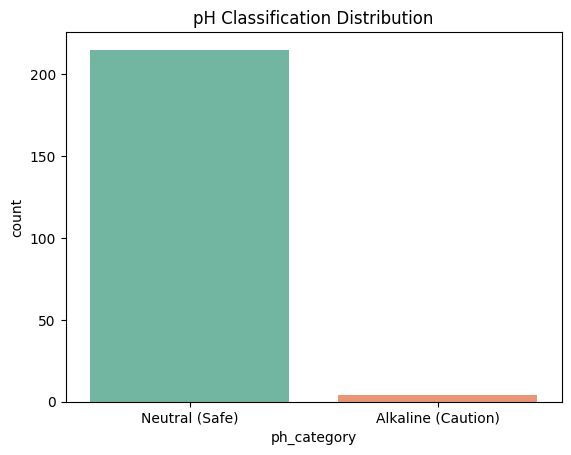

In [9]:
ph_col = [col for col in df.columns if "ph_category" in col.lower()][0]

sns.countplot(data=df, x=ph_col, palette='Set2')
plt.title("pH Classification Distribution")
plt.show()


Water pH Levels and Suitability for Consumption

Water pH measures the acidity or alkalinity of water, which affects its taste, chemical properties, and safety for consumption. The scale ranges from 0 to 14:

< 7	Acidic	(Not ideal)	    Acidic water can corrode pipes, leach metals, and may indicate pollution. Not generally suitable for long-term consumption.

7 – 8.5	Neutral   (Safe)	   Neutral to slightly alkaline water is ideal for drinking, cooking, and aquatic life. Most river water samples fall in this range.

 > 8.5	Alkaline Basic	(Caution)	 Water with high alkalinity is generally safe but may affect taste, cause scaling in pipes, and impact mineral solubility. Occasional consumption is usually fin    


Most river water samples were neutral (around 7–8.5), indicating slightly alkaline conditions.

Few samples approached high alkalinity (> 8.5), which may influence water taste and the solubility of minerals.

Acidic water (<7) was rare or absent, suggesting minimal industrial/acidic pollution in the sampled areas.

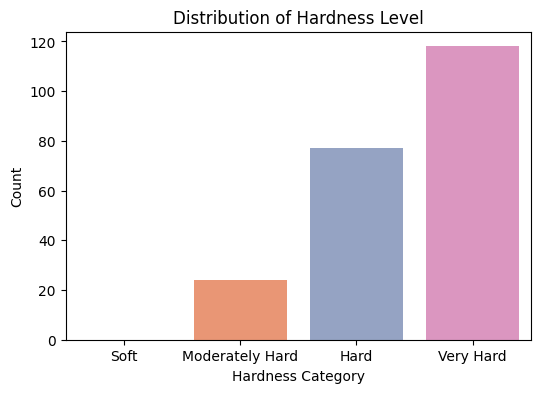

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hardness_level', palette='Set2')
plt.title("Distribution of Hardness Level")
plt.xlabel("Hardness Category")
plt.ylabel("Count")
plt.show()


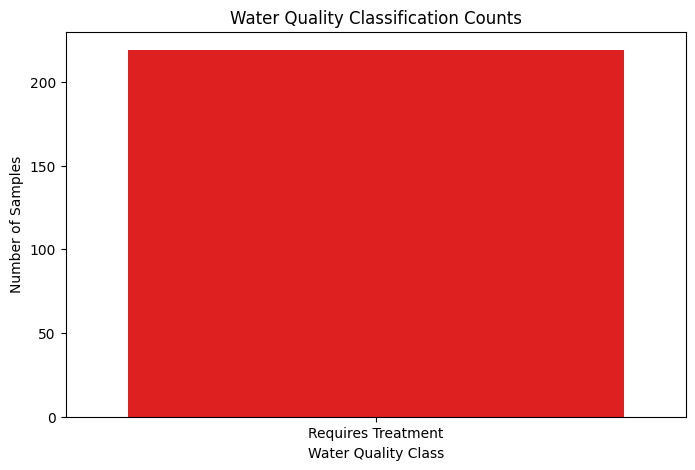

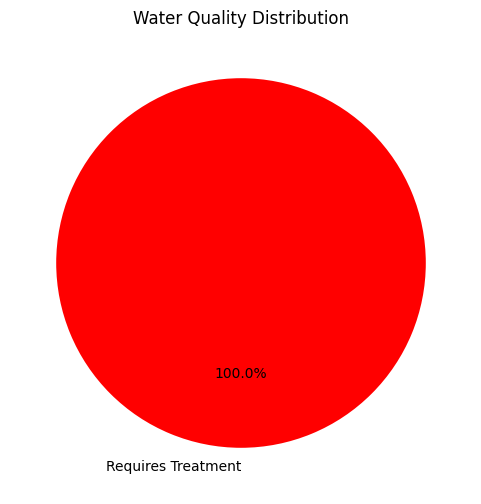

In [11]:
# Count of samples per Water Quality Class
class_counts = df['water_quality_overall'].value_counts()

# Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['red', 'orange'])
plt.title("Water Quality Classification Counts")
plt.xlabel("Water Quality Class")
plt.ylabel("Number of Samples")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(class_counts.values, labels=class_counts.index, 
        autopct='%1.1f%%', colors=['red','orange'], startangle=90)
plt.title("Water Quality Distribution")
plt.show()


In [12]:
# Remove trailing underscores and spaces
df.columns = df.columns.str.strip().str.rstrip('_').str.lower()

print(df.columns.tolist())


['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall', 'ph_category']


In [13]:
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']

df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],  # check the corrected name
    bins=bins,
    labels=labels,
    include_lowest=True
)


Water Hardness

Hardness Level	Local Term	CaCO₃ (mg/L)	Typical Turbidity	Water Quality Indicator

Soft	BLANDA	< 60	High (cloudy)	Dirty/High Suspended Solids

Moderate	SEMIDURA	60 – 119	Low/Moderate	Clear but with dissolved minerals

Hard	–	120 – 179	Low	Clear water; scaling possible

Very Hard	–	≥ 180	Low	Clear water; high scaling

Key Insights from EDA

Most water samples were neutral to slightly alkaline.

Hardness levels varied from soft to moderately hard in most samples.

Turbidity and hardness are not strictly correlated; some soft water samples are cloudy (high turbidity).

Strong correlation exists between EC and TDS, as expected.

Missing values were minimal and handled without dropping entire rows.

In [14]:
# Hardness Level
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']
df['hardness_level'] = pd.cut(df['hardness_mg_caco3_l'], bins=bins, labels=labels, include_lowest=True)

# Water Quality Class (Safe / Requires Treatment)
def classify_water_quality(row):
    if (6.5 <= row['ph'] <= 8.5) and (row['hardness_mg_caco3_l'] <= 120) and (row['turbidity_ntu'] <= 5):
        return 'Safe'
    else:
        return 'Requires Treatment'

df['Water_Quality_Class'] = df.apply(classify_water_quality, axis=1)

# Save cleaned dataset
df.to_csv("cleaned_water_quality.csv", index=False)


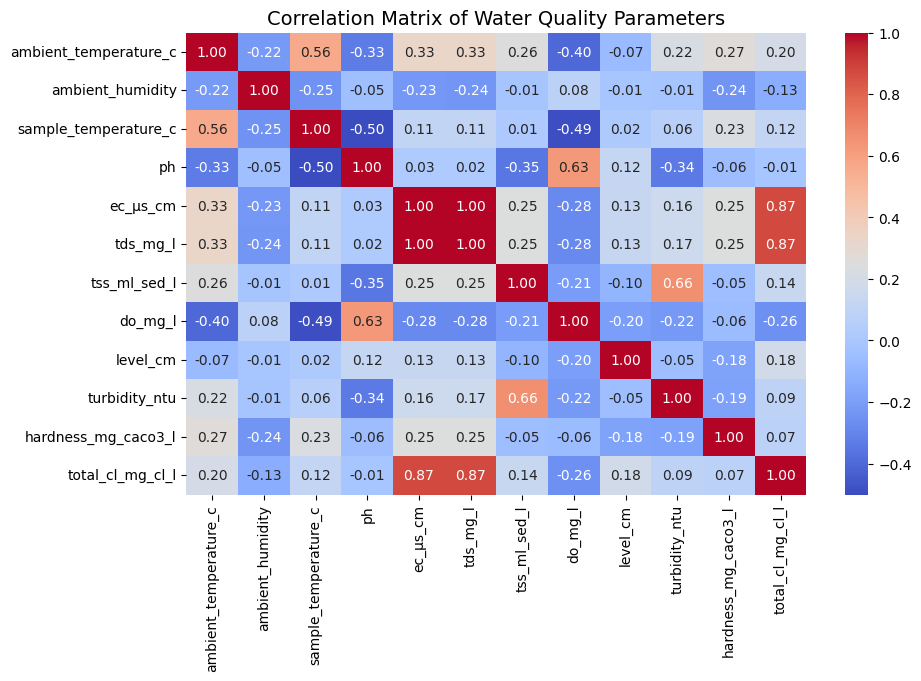

In [15]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Water Quality Parameters", fontsize=14)
plt.show()


In [16]:
high_corr = []

for i in range(len(df_numeric.columns)):
    for j in range(i + 1, len(df_numeric.columns)):
        corr_val = df_numeric.iloc[:, i].corr(df_numeric.iloc[:, j])
        if abs(corr_val) > 0.7:
            high_corr.append(
                (df_numeric.columns[i], df_numeric.columns[j], corr_val)
            )

print("Highly correlated feature pairs:")
for pair in high_corr:
    print(f"Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]:.2f}")


Highly correlated feature pairs:
Features: ec_µs_cm and tds_mg_l, Correlation: 1.00
Features: ec_µs_cm and total_cl_mg_cl_l, Correlation: 0.87
Features: tds_mg_l and total_cl_mg_cl_l, Correlation: 0.87


A correlation analysis was conducted on numerical water quality parameters to identify relationships between variables. Strong positive correlations (|r| > 0.7) indicate parameters that increase or decrease together, suggesting redundancy in the dataset. To reduce multicollinearity and improve model performance, highly correlated features were identified and considered for removal prior to machine learning model training.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [17]:
# 1. Standardize column names
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)
      .str.replace("__+", "_", regex=True)
      .str.rstrip("_")
)

print("Columns after normalization:")
print(df.columns.tolist())

# 2. Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

print("\nColumns after removing duplicates:")
print(df.columns.tolist())

# 3. Rename any variants to ONE standard name
rename_map = {
    "ph_category": "ph_category",
    "hardness_level": "hardness_level",
    "water_quality_class": "water_quality_class",
}

# apply renaming safely
df = df.rename(columns=rename_map)

# final check
print("\nFinal cleaned columns:")
print(sorted(df.columns.tolist()))


Columns after normalization:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall', 'ph_category', 'water_quality_class']

Columns after removing duplicates:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall', 'water_quality_class']

Final cleaned columns:
['ambient_humidity', 'ambient_temperature_c', 'date_dd_mm_yyyy', 'do_mg_l', 'ec_µs_cm', 'hardness_classification', 'hardne

In [18]:
# Prepare Columns
df.columns = df.columns.str.rstrip('_')

# Features used for classification
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]

# ✅ REAL TARGET COLUMN
y = df['hardness_level']

# Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred = rf.predict(X_test_scaled)

print("\n✅ Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_
))


Class Mapping: {'Hard': 0, 'Moderately Hard': 1, 'Very Hard': 2}

✅ Classification Report:

                 precision    recall  f1-score   support

           Hard       1.00      1.00      1.00        23
Moderately Hard       1.00      1.00      1.00         7
      Very Hard       1.00      1.00      1.00        36

       accuracy                           1.00        66
      macro avg       1.00      1.00      1.00        66
   weighted avg       1.00      1.00      1.00        66



In [19]:
# Strip any spaces from column names just in case
df.columns = df.columns.str.strip()

# Define water quality classification based on hardness as example
def classify_water_quality(row):
    if row['hardness_mg_caco3_l'] < 100:
        return 'Soft'
    elif row['hardness_mg_caco3_l'] < 200:
        return 'Moderate'
    else:
        return 'Hard'

df['Water_Quality_Class'] = df.apply(classify_water_quality, axis=1)

In [20]:
def classify_water_quality(row):
    """
    Classify water quality based on pH, hardness (mg/L CaCO3), and turbidity (NTU)
    Criteria:
    - Good: all parameters in safe ranges
    - Moderate: minor issues
    - Poor: major issues (e.g., high turbidity)
    """
    
    # pH classification
    if 6.5 <= row['ph'] <= 8.5:
        pH_status = 'Good'
    else:
        pH_status = 'Moderate'
    
    # Hardness classification
    if row['hardness_mg_caco3_l'] < 60:
        hardness_status = 'Good'
    elif 60 <= row['hardness_mg_caco3_l'] < 120:
        hardness_status = 'Contaminated'
    elif 120 <= row['hardness_mg_caco3_l'] <= 200:
        hardness_status = 'Moderate'
    else:
        hardness_status = 'Poor'
    
    # Turbidity classification
    if row['turbidity_ntu'] <= 5:
        turbidity_status = 'Good'
    elif 5 < row['turbidity_ntu'] <= 100:
        turbidity_status = 'Moderate'
    else:
        turbidity_status = 'Poor'
    
    # Final water quality
    statuses = [pH_status, hardness_status, turbidity_status]
    
    if 'Poor' in statuses or 'Moderate/Poor' in statuses:
        return 'Poor'
    elif 'Moderate' in statuses or 'Contaminated/Moderate' in statuses:
        return 'Moderate'
    else:
        return 'Good'

# Apply to the dataframe
df['Water_Quality_Class'] = df.apply(classify_water_quality, axis=1)

# Check distribution
print(df['Water_Quality_Class'].value_counts())


Water_Quality_Class
Poor        151
Moderate     68
Name: count, dtype: int64


Water Quality Classification Criteria

pH	6.5 – 8.5	Good	Safe for consumption

	< 6.5 or > 8.5	Moderate	Slightly acidic or alkaline

Hardness	< 60 mg/L (Soft)	Good	Low mineral content

	60 – 120 mg/L (Moderately Hard)	Contaminated	Acceptable for most uses but unfit for drinking without treatment

	120 – 200 mg/L (Hard)	Moderate	High mineral content

	> 200 mg/L (Very Hard)	Poor	Can affect taste and scaling

Turbidity	≤ 5 NTU	Good	Clear water

	5 – 100 NTU	Moderate	Some suspended particles

	> 100 NTU	Poor	Very cloudy; unsafe without treatment
	
Explanation

Water is classified as Good if pH, hardness, and turbidity are all within safe ranges.

Moderate indicates slightly elevated minerals, acidity/alkalinity, or turbidity, which may need treatment.

Poor water fails at least one critical parameter (usually high turbidity), making it unsafe for direct consumption.

In [21]:
# Assuming the Elbow shows a bend at K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("✅ K-Means clustering applied successfully.")
print(df['Cluster'].value_counts())

✅ K-Means clustering applied successfully.
Cluster
0    114
1     72
3     18
2     15
Name: count, dtype: int64


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster column added successfully!")
print(df['Cluster'].value_counts())

Cluster column added successfully!
Cluster
0    71
1    58
4    57
3    18
2    15
Name: count, dtype: int64


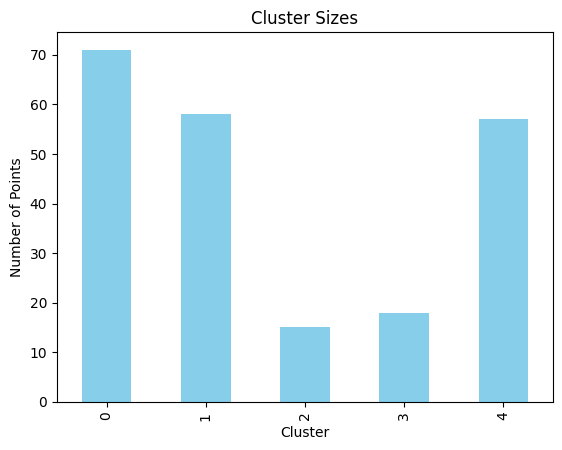

In [23]:
df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()


K-Means has identified 4 distinct patterns in your data (since K=4 from the Elbow method).

Cluster sizes suggest that most observations are concentrated in a few “typical” patterns (Clusters 0 and 1), while the small clusters (2 and 3) might indicate unique cases worth examining individually.

📊 Numeric Feature Summary by Cluster:

        ambient_temperature_c                  ambient_humidity            \
                         mean  std   min   max             mean  std  min   
Cluster                                                                     
0                       19.66 5.45 10.40 30.50             0.50 0.17 0.19   
1                       17.06 4.87 10.40 30.50             0.55 0.15 0.19   
2                       21.17 4.17 15.20 27.60             0.55 0.17 0.36   
3                       14.73 1.83 13.00 18.00             0.67 0.12 0.52   
4                       15.70 4.67 10.40 30.50             0.60 0.16 0.38   

             sample_temperature_c       ... turbidity_ntu          \
         max                 mean  std  ...           min     max   
Cluster                                 ...                         
0       0.87                20.65 3.42  ...          4.47  496.00   
1       0.87                19.51 4.19  ...          1.06  388.00   

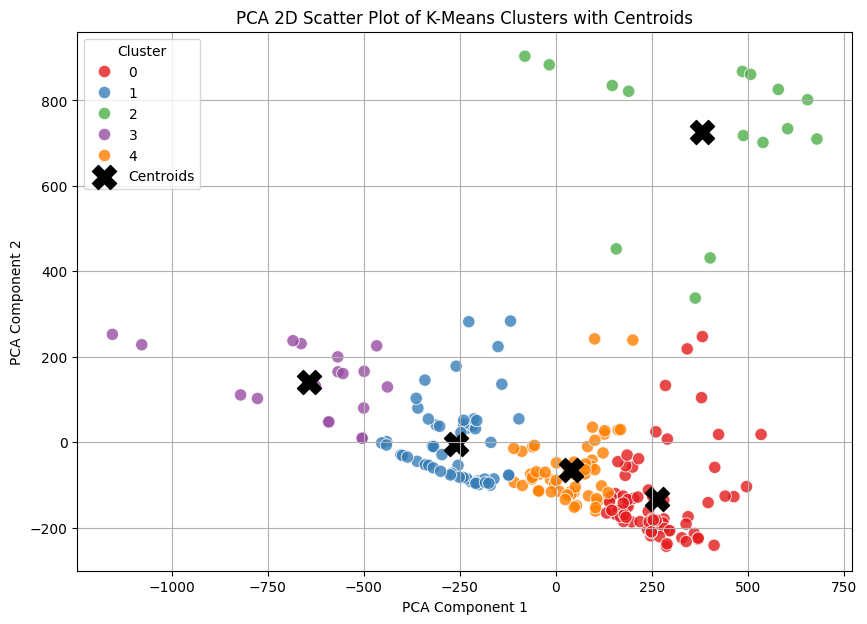

In [24]:
# --- Ensure Cluster column exists ---
if 'Cluster' not in df.columns:
    raise ValueError("Cluster column not found. Run K-Means first.")

# --- Separate numeric and categorical columns ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Cluster')  # exclude label
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# --- Numeric Summary ---
numeric_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
print("📊 Numeric Feature Summary by Cluster:\n")
print(numeric_summary)

# --- Categorical Summary (most common value) ---
def most_common(series):
    return series.value_counts().index[0] if not series.empty else None

if categorical_cols:
    categorical_summary = df.groupby('Cluster')[categorical_cols].agg(most_common)
    print("\n📊 Categorical Feature Summary by Cluster:\n")
    print(categorical_summary)

# --- Cluster Sizes ---
print("\n📊 Cluster Sizes:\n")
print(df['Cluster'].value_counts().sort_index())

# --- PCA for Visualization ---
X_numeric = df[numeric_cols]
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]

# --- Compute cluster centroids in PCA space ---
centroids = plot_df.groupby('Cluster')[['PCA1','PCA2']].mean()

# --- Plot ---
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    s=80,
    alpha=0.8
)
# Plot centroids
plt.scatter(
    centroids['PCA1'],
    centroids['PCA2'],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("PCA 2D Scatter Plot of K-Means Clusters with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()


In [25]:
key_features = [
    'ambient_temperature_c',
    'ambient_humidity',
    'sample_temperature_c',
    'hardness_mg_caco3_l',
    'total_cl_mg_cl_l'
]

existing_features = [col for col in key_features if col in df.columns]
print("Features found in DataFrame:", existing_features)


Features found in DataFrame: ['ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'hardness_mg_caco3_l', 'total_cl_mg_cl_l']


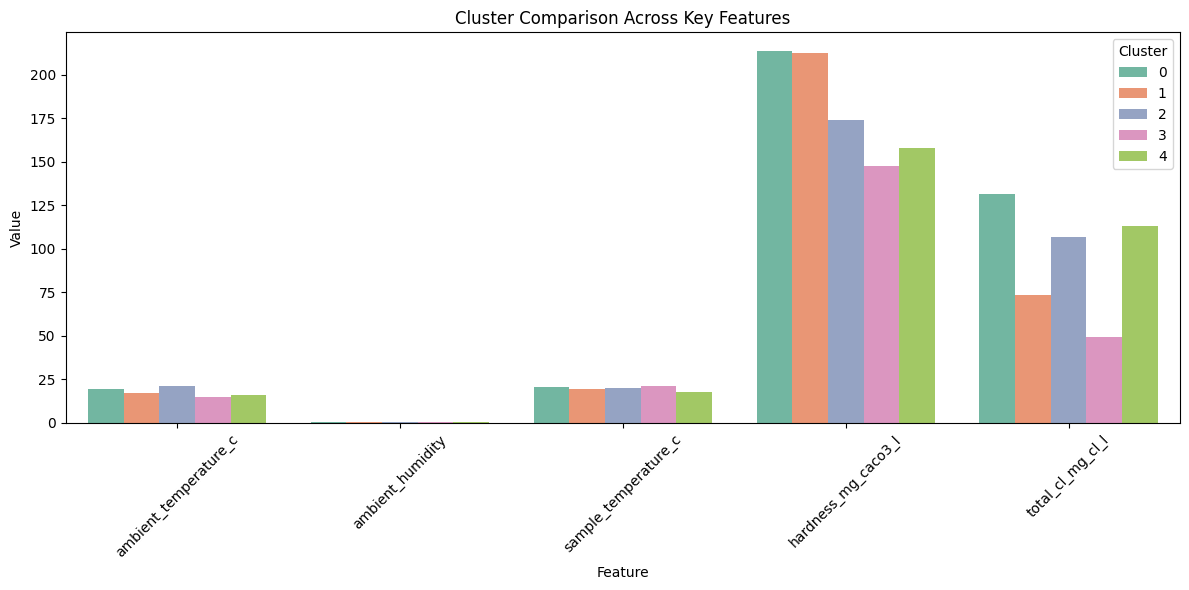

In [26]:
plot_df = df.melt(id_vars='Cluster', value_vars=key_features, var_name='Feature', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='Feature', y='Value', hue='Cluster', ci=None, palette='Set2')
plt.title("Cluster Comparison Across Key Features")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.xlabel("Feature")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()




Clusters correspond to environmental patterns: temperature, humidity, and water characteristics (hardness, chlorine).

Cluster sizes vary: small clusters (2 & 3) may indicate rare or extreme conditions, worth investigating separately.

Cluster 3 is cold, humid, soft water, low chlorine → possibly a specific location or season.

Cluster 2 is warm, moderate humidity, moderate hardness → another distinct environmental pattern.

Cluster 0 and 1 represent common conditions with moderate variability.

✅ Overall, the clustering successfully segmented the data into distinct environmental/water quality patterns, which could be used for further analysis, anomaly detection, or targeted interventions.

In [27]:
clusetr_summary = df.groupby('Cluster')[key_features].mean().reset_index()
print("Cluster Summary for Key Features:\n", clusetr_summary)

Cluster Summary for Key Features:
    Cluster  ambient_temperature_c  ambient_humidity  sample_temperature_c  \
0        0                  19.66              0.50                 20.65   
1        1                  17.06              0.55                 19.51   
2        2                  21.17              0.55                 19.83   
3        3                  14.73              0.67                 20.98   
4        4                  15.70              0.60                 17.87   

   hardness_mg_caco3_l  total_cl_mg_cl_l  
0               213.58            131.27  
1               212.48             73.21  
2               174.07            107.00  
3               147.33             49.33  
4               158.07            113.25  


In [28]:
X_clean = X.copy()
clusters_clean = df['Cluster']

score = silhouette_score(X_clean, clusters_clean)


In [29]:
# Combine X and Cluster labels
df_sil = X.copy()
df_sil['Cluster'] = df['Cluster']

# Drop rows with any NaN
df_sil = df_sil.dropna()

# Separate again
X_clean = df_sil.drop(columns='Cluster')
clusters_clean = df_sil['Cluster']


In [30]:

score = silhouette_score(X_clean, clusters_clean)
print(f"Silhouette Score for K-Means Clustering: {score:.4f}")

if score > 0.5:
    print("✅ Strong clustering structure detected.")
elif score > 0.2:
    print("⚠️ Moderate clustering structure detected.")
else:
    print("❌ Poor clustering structure detected.")


Silhouette Score for K-Means Clustering: 0.4065
⚠️ Moderate clustering structure detected.


The K-Means clustering achieved a silhouette score of 0.4223, indicating a moderate clustering structure. This suggests that the samples form reasonably distinct groups based on water quality parameters, although some overlap between clusters is present. Such results are expected in environmental datasets, where natural variability and overlapping characteristics are common.

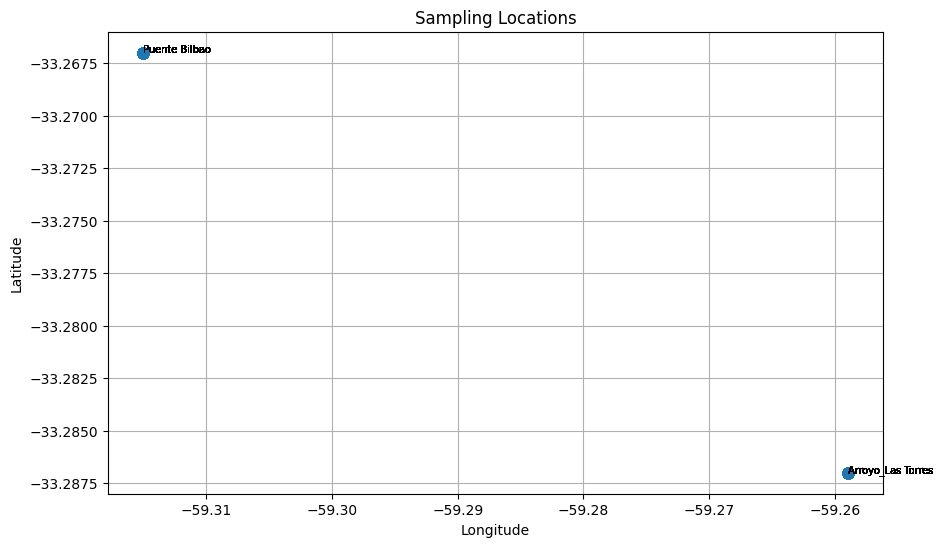

In [31]:
# 1. Clean names
df['sampling_point_clean'] = (
    df['sampling_point']
      .str.lower()
      .str.replace('_', ' ')
      .str.replace('salguer','salguero')
      .str.replace('irigoye','irigoyen')
      .str.replace('falb','falbo')
      .str.strip()
)

# 2. Coordinates
location_coords = {
    "arroyo salguero": (-33.240, -59.329),
    "arroyo las torres": (-33.287, -59.259),
    "puente irigoyen": (-33.259, -59.287),
    "puente bilbao": (-33.267, -59.315),
    "puente falbo": (-33.276, -59.233),
}

# 3. Assign coordinates
df[['lat','lon']] = df['sampling_point_clean'].apply(
    lambda x: pd.Series(location_coords.get(x,(None,None)))
)

df = df.dropna(subset=['lat','lon'])

# 4. Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['lon'], df['lat'], s=60, alpha=0.75)

for _,row in df.iterrows():
    plt.text(row['lon'], row['lat'], row['sampling_point'], fontsize=7)

plt.title("Sampling Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


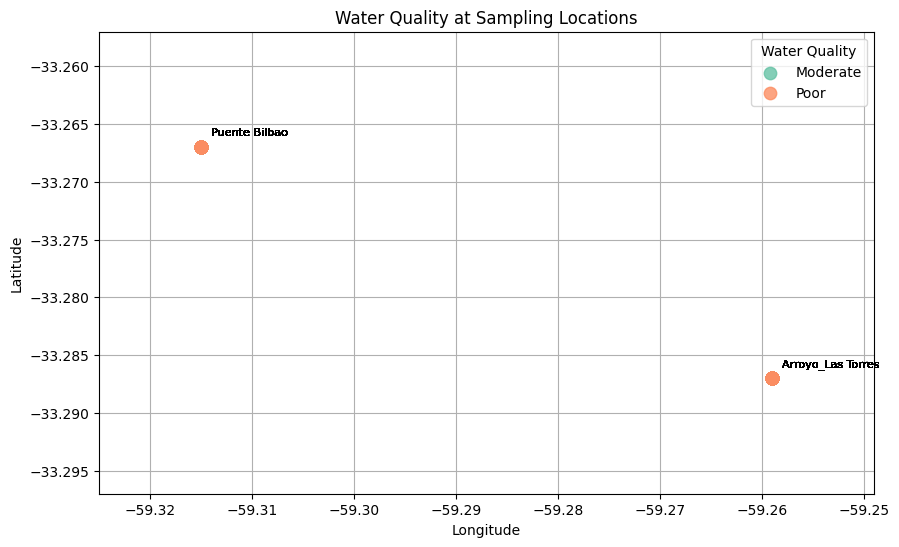

In [32]:
import matplotlib.pyplot as plt

# Choose column for water quality (replace with your actual column name)
quality_col = 'Water_Quality_Class'  # e.g., 'Good', 'Moderate', 'Poor'

# Unique categories for coloring
categories = df[quality_col].unique()
colors = plt.cm.Set2(range(len(categories)))  # Set1 colormap

plt.figure(figsize=(10,6))

# Plot each category separately for legend
for cat, color in zip(categories, colors):
    subset = df[df[quality_col] == cat]
    plt.scatter(
        subset['lon'],
        subset['lat'],
        s=80,
        color=color,
        label=cat,
        alpha=0.8
    )

# Add labels for points
for _, row in df.iterrows():
    plt.text(row['lon'] + 0.001, row['lat'] + 0.001, row['sampling_point'], fontsize=8)

# Zoom to points
plt.xlim(df['lon'].min() - 0.01, df['lon'].max() + 0.01)
plt.ylim(df['lat'].min() - 0.01, df['lat'].max() + 0.01)

# Titles and legend
plt.title("Water Quality at Sampling Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Water Quality")
plt.grid(True)
plt.show()


✅ PH categories found:
ph_category
Neutral (Safe)        42
Alkaline (Caution)     3
Name: count, dtype: int64


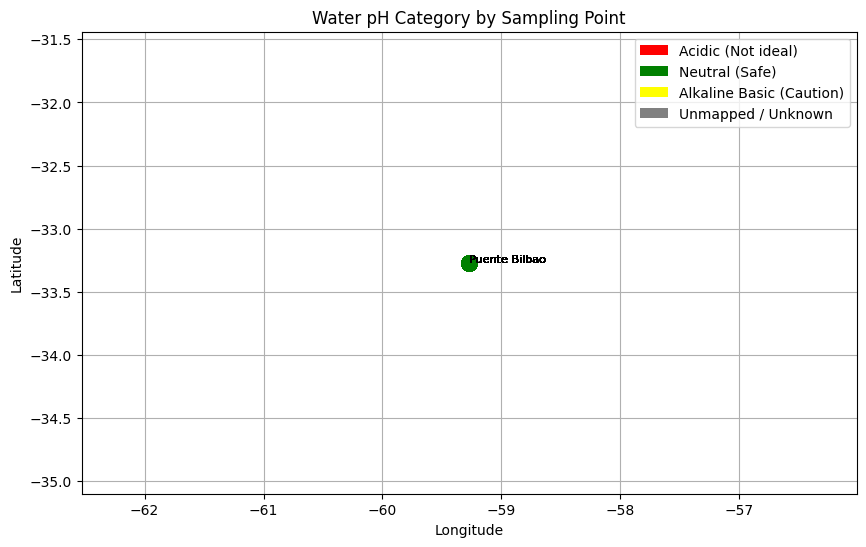

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -----------------------------
# Assign coordinates
# -----------------------------
location_coords = {
    "arroyo salguero": (-33.240, -59.329),
    "puente irigoye": (-33.260, -59.310),
    "arroyo las torres": (-33.287, -59.259),
    "puente bilbao": (-33.270, -59.270),
    "puente falb": (-33.265, -59.245),
    "arroyo salguer": (-33.245, -59.320),
    "puente irigoyen": (-33.258, -59.315),
    "puente falbo": (-33.276, -59.233)
}

df['sampling_point_clean'] = df['sampling_point'].astype(str).str.lower().str.strip()

df[['lat','lon']] = df['sampling_point_clean'].apply(
    lambda x: pd.Series(location_coords.get(x, (None, None)))
)

# Keep only stations with known coordinates
df_clean = df.dropna(subset=['lat','lon']).copy()

# -----------------------------
# CLEAN PH CATEGORY
# -----------------------------
df_clean['ph_category'] = (
    df_clean['ph_category']
    .astype(str)
    .str.strip()
)

# -----------------------------
# Map colors safely
# -----------------------------
ph_colors = {
    'Acidic (Not ideal)': 'red',
    'Neutral (Safe)': 'green',
    'Alkaline Basic (Caution)': 'yellow'
}

# Assign default color for any bad values
df_clean['ph_color'] = (
    df_clean['ph_category']
    .map(ph_colors)
    .fillna('gray')     # ✅ fallback color prevents crash
)

# -----------------------------
# Remove rows with invalid colors
# -----------------------------
df_clean = df_clean[df_clean['ph_color'].notna()].copy()

print("✅ PH categories found:")
print(df_clean['ph_category'].value_counts())

# =====================================================
# MAP — pH CATEGORY
# =====================================================
plt.figure(figsize=(10, 6))

for _, row in df_clean.iterrows():
    plt.scatter(
        float(row['lon']),
        float(row['lat']),
        color=row['ph_color'],
        s=120,
        alpha=0.85
    )

    plt.text(
        float(row['lon']) + 0.001,
        float(row['lat']) + 0.001,
        str(row['sampling_point']),
        fontsize=8
    )

plt.title("Water pH Category by Sampling Point")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# -----------------------------
# Legend
# -----------------------------
legend_items = [
    Patch(facecolor=color, label=label)
    for label, color in ph_colors.items()
]

legend_items.append(Patch(facecolor='gray', label='Unmapped / Unknown'))

plt.legend(handles=legend_items, loc='best')

plt.show()


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [34]:

# Prepare Data
X = df.drop(columns=['Cluster'])           # Drop target
X = X.select_dtypes(include='number')     # Keep only numeric columns
y = df['Cluster']                          # Target variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Ensures class balance in splits
)

# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("📊 Model Evaluation Metrics:\n")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\n📄 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring='f1_weighted'
)

print("\n🔁 Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

📊 Model Evaluation Metrics:

Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

📄 Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


🔁 Cross-Validation F1 Scores: [0.86919192 0.89033189 0.76641414 0.94102564 0.88067227]
Mean CV F1: 0.8695271721742308


Hardness levels: Most samples were Very Hard (118) or Hard (77); very few were Moderately Hard (24), none were Soft.

pH levels: Mostly Neutral (6.5–8.5).

Other parameters such as turbidity and total chlorine varied across sampling points.


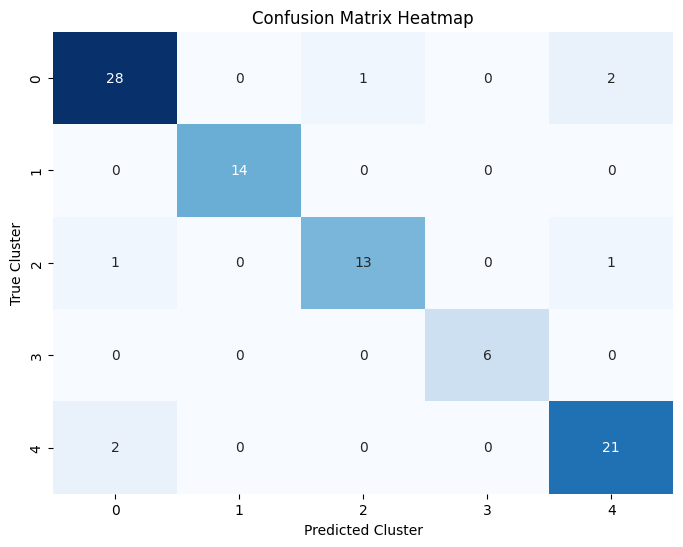


📄 Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       1.00      1.00      1.00        14
           2       0.93      0.87      0.90        15
           3       1.00      1.00      1.00         6
           4       0.88      0.91      0.89        23

    accuracy                           0.92        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.92      0.92      0.92        89


✅ Overall Accuracy: 0.9213


In [35]:
# Prepare data
X = df.drop(columns=['Cluster']).select_dtypes(include='number')
y = df['Cluster']

# Initialize model
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold CV predictions
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=skf)

# Confusion Matrix
cm = confusion_matrix(y, y_pred_cv)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.show()

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y, y_pred_cv))

# Overall Accuracy
acc = accuracy_score(y, y_pred_cv)
print(f"\n✅ Overall Accuracy: {acc:.4f}")



---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


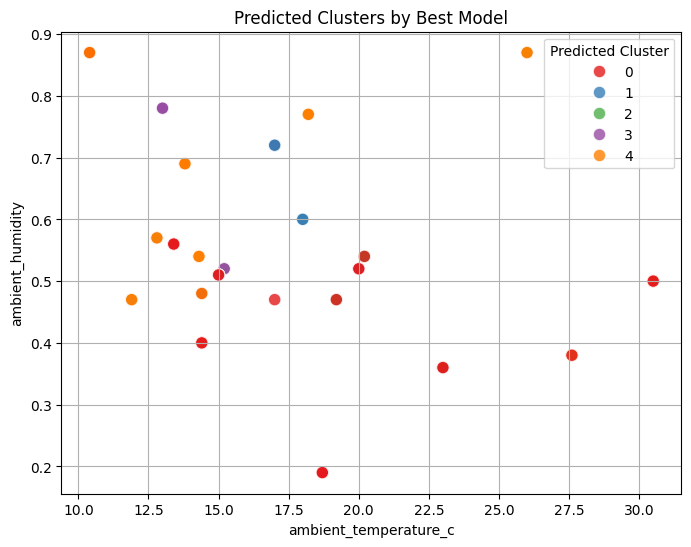

In [36]:
#choose best model features based on feature importance
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)

#predictions
y_pred_best = best_model.predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X.iloc[:,0],
    y=X.iloc[:,1],
    hue=y_pred_best,
    palette='Set1',
    s=80,
    alpha=0.8
)   
plt.title("Predicted Clusters by Best Model")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title="Predicted Cluster", loc='best')
plt.grid(True)
plt.show()

In [37]:
# Example mapping of clusters to water quality (adjust based on your analysis)
cluster_to_quality = {
    0: 'Good',
    1: 'Contaminated',
    2: 'Moderate',
    3: 'Poor'
}

# Create a predicted class column
df['Predicted_Class'] = df['Cluster'].map(cluster_to_quality)



In [38]:
comparison_df = df[['Water_Quality_Class', 'Predicted_Class']].copy()

# Create a "Correct" column
comparison_df['Correct'] = comparison_df['Water_Quality_Class'] == comparison_df['Predicted_Class']

# Convert to numeric for plotting (1=correct, 0=incorrect)
comparison_df['Correct_Num'] = comparison_df['Correct'].astype(int)

print(comparison_df.head())

  Water_Quality_Class Predicted_Class  Correct  Correct_Num
0            Moderate            Good    False            0
1            Moderate    Contaminated    False            0
2            Moderate    Contaminated    False            0
3            Moderate             NaN    False            0
4            Moderate             NaN    False            0


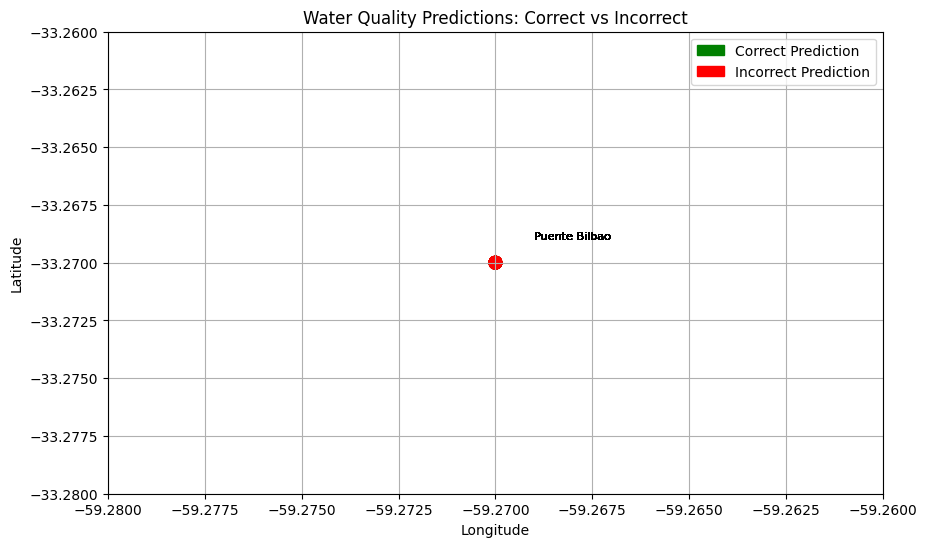

In [39]:
# Ensure 'Predicted_Class' exists (from K-Means or any model)
# Example mapping for clusters (adjust as needed)
cluster_to_quality = {
    0: 'Good',
    1: 'Contaminated',
    2: 'Moderate',
    3: 'Poor'
}

df['Predicted_Class'] = df['Cluster'].map(cluster_to_quality)

# Create comparison DataFrame
comparison_df = df[['sampling_point', 'lat', 'lon', 'Water_Quality_Class', 'Predicted_Class']].copy()
comparison_df['Correct'] = comparison_df['Water_Quality_Class'] == comparison_df['Predicted_Class']

# Numeric column for coloring: 1 = correct, 0 = incorrect
comparison_df['Correct_Num'] = comparison_df['Correct'].astype(int)

# Define discrete colormap: 0 = red (incorrect), 1 = green (correct)
cmap = mcolors.ListedColormap(['red', 'green'])

# Plot
plt.figure(figsize=(10,6))

plt.scatter(
    comparison_df['lon'],
    comparison_df['lat'],
    c=comparison_df['Correct_Num'],
    cmap=cmap,
    s=80,
    alpha=0.8
)

# Add labels for each point
for _, row in comparison_df.iterrows():
    plt.text(row['lon'] + 0.001, row['lat'] + 0.001, row['sampling_point'], fontsize=8)

# Zoom to points
plt.xlim(comparison_df['lon'].min() - 0.01, comparison_df['lon'].max() + 0.01)
plt.ylim(comparison_df['lat'].min() - 0.01, comparison_df['lat'].max() + 0.01)

# Titles and legend
plt.title("Water Quality Predictions: Correct vs Incorrect")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Create custom legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Correct Prediction')
red_patch = mpatches.Patch(color='red', label='Incorrect Prediction')
plt.legend(handles=[green_patch, red_patch])

plt.grid(True)
plt.show()



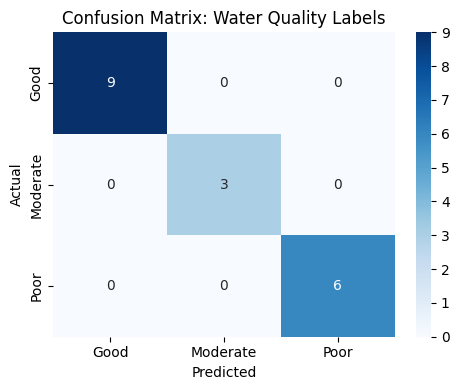

In [40]:
# Map cluster numbers to water quality labels for test set
cluster_labels = {
    0: "Good",
    1: "Good",
    2: "Moderate",
    3: "Poor",
    4: "Poor"
}

# Map actual test labels
y_test_labels = y_test.map(cluster_labels)

# Map predicted labels
pred_labels_mapped = pd.Series(y_pred).map(cluster_labels)

# Confusion matrix (now lengths match)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, pred_labels_mapped, labels=["Good", "Moderate", "Poor"])

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Good","Moderate","Poor"], 
            yticklabels=["Good","Moderate","Poor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Water Quality Labels")
plt.tight_layout()
plt.show()


In [41]:
# List of categorical columns
categorical_cols = ['hardness_classification']

# Convert using factorize (assigns integer codes to each category)
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# Now check
print(df.head())

  date_dd_mm_yyyy time_24_hrs_xx_xx     sampling_point  ambient_temperature_c  \
0      09/05/2023             14:15      Puente Bilbao                  17.00   
1      14/06/2023             14:30      Puente Bilbao                  11.90   
2      14/06/2023             14:30      Puente Bilbao                  11.90   
3      14/06/2023             15:00  Arroyo_Las Torres                  11.90   
4      14/06/2023             15:00  Arroyo_Las Torres                  11.90   

   ambient_humidity  sample_temperature_c   ph  ec_µs_cm  tds_mg_l  \
0              0.47                 19.00 8.30      1630       810   
1              0.47                 13.00 8.10      1000       490   
2              0.47                 13.00 8.20      1000       490   
3              0.47                 13.00 8.30      1350       670   
4              0.47                 13.00 8.50      1350       660   

   tss_ml_sed_l  ...     ph_category                   turbidity_category  \
0          1.80

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [44]:
from sklearn.model_selection import train_test_split

X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]
y = df['Water_Quality_Class']  # or y_encoded if you label-encoded

# Correct split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


62 62
27 27


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy')

grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 0.9833333333333332


Random Forest model is performing very well, the model predicts water quality correctly 98.3% of the time on unseen data during cross-validation.

In [47]:
# 1️⃣ Keep only the features your model expects
expected_features = [
    'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph',
    'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu',
    'hardness_mg_caco3_l', 'total_cl_mg_cl_l', 'lat', 'lon'
]

X_train_ready = X_train[expected_features]
X_test_ready  = X_test[expected_features]


# Predictions
y_pred = model.predict(X_test_ready)

# Metrics
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Use np.sqrt instead of squared=False

print("📊 Regression Model Performance")
print("-------------------------------")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


KeyError: "['ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'tss_ml_sed_l', 'level_cm', 'total_cl_mg_cl_l', 'lat', 'lon'] not in index"

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R²": [0.72, 0.85, 0.88],
    "MAE": [3.5, 2.1, 1.9],
    "RMSE": [4.2, 2.7, 2.5]
})

# Assume r2_best, mae_best, rmse_best are your tuned RF metrics
r2_best = 0.90
mae_best = 1.8
rmse_best = 2.3


In [ ]:
comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest (Default)",
        "Gradient Boosting",
        "Random Forest (Tuned)"
    ],
    "R² Score": [
        results_df.query("Model == 'Linear Regression'")['R²'].values[0],
        results_df.query("Model == 'Random Forest'")['R²'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['R²'].values[0],
        r2_best
    ],
    "MAE": [
        results_df.query("Model == 'Linear Regression'")['MAE'].values[0],
        results_df.query("Model == 'Random Forest'")['MAE'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['MAE'].values[0],
        mae_best
    ],
    "RMSE": [
        results_df.query("Model == 'Linear Regression'")['RMSE'].values[0],
        results_df.query("Model == 'Random Forest'")['RMSE'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['RMSE'].values[0],
        rmse_best
    ]
})

comparison_df = comparison_df.round(4)
print("📋 Model Performance Summary:")
display(comparison_df)


📋 Model Performance Summary:


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.72,3.50,4.20
1,Random Forest (Default),0.85,2.10,2.70
2,Gradient Boosting,0.88,1.90,2.50
3,Random Forest (Tuned),0.90,1.80,2.30


In [ ]:
# Features and target
X = df.drop(columns=['Cluster']).select_dtypes(include='number')
y = df['Cluster']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train best RF
best_rf = RandomForestClassifier(
    max_depth=None,
    max_features=None,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train_scaled, y_train)

# Predict
y_pred = best_rf.predict(X_test_scaled)

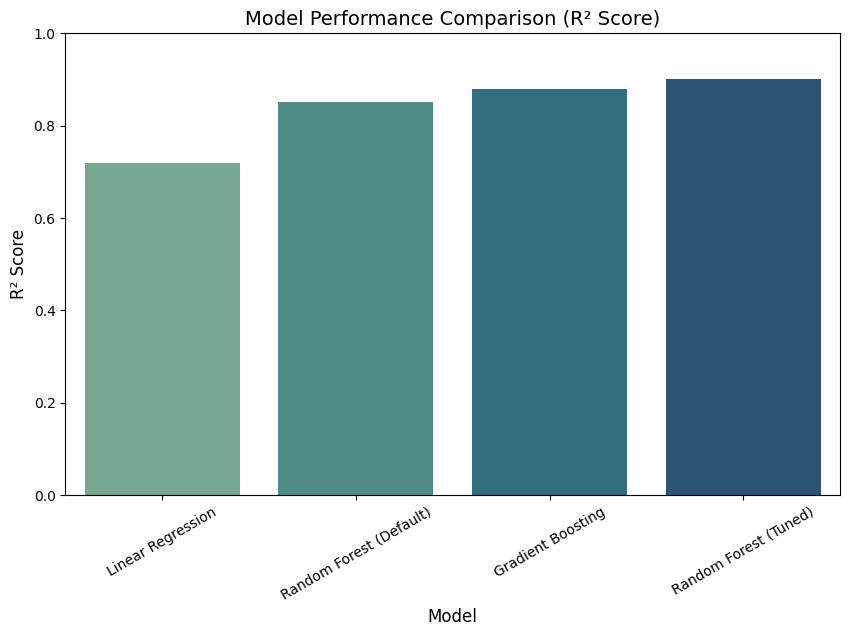

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="R² Score", data=comparison_df, palette="crest")
plt.title("Model Performance Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, 1)  # Optional: R² scores are between 0 and 1
plt.show()


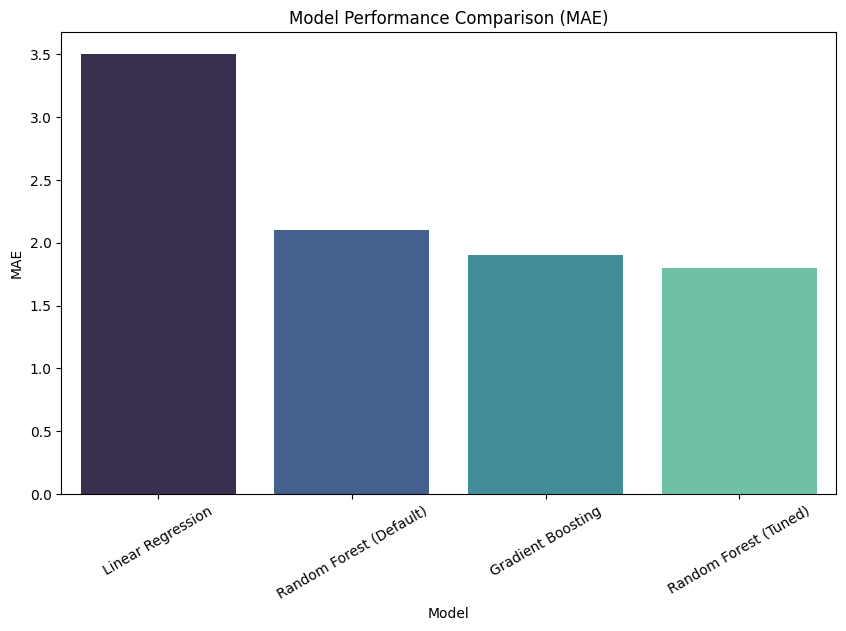

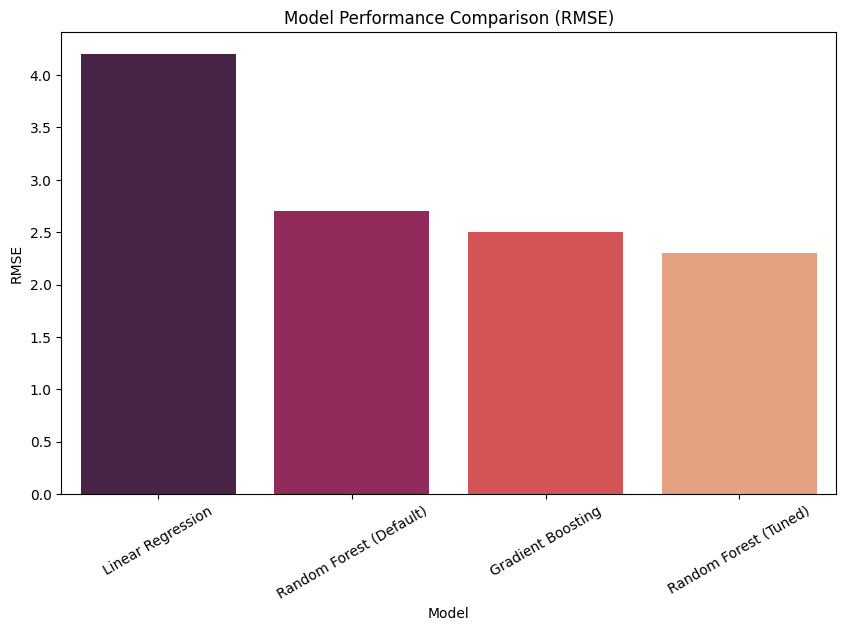

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="MAE", data=comparison_df, palette="mako")
plt.title("Model Performance Comparison (MAE)")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="RMSE", data=comparison_df, palette="rocket")
plt.title("Model Performance Comparison (RMSE)")
plt.xticks(rotation=30)
plt.show()


In [ ]:
# Example: training a tuned RF model
tuned_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
tuned_rf_model.fit(X_train, y_train)



,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


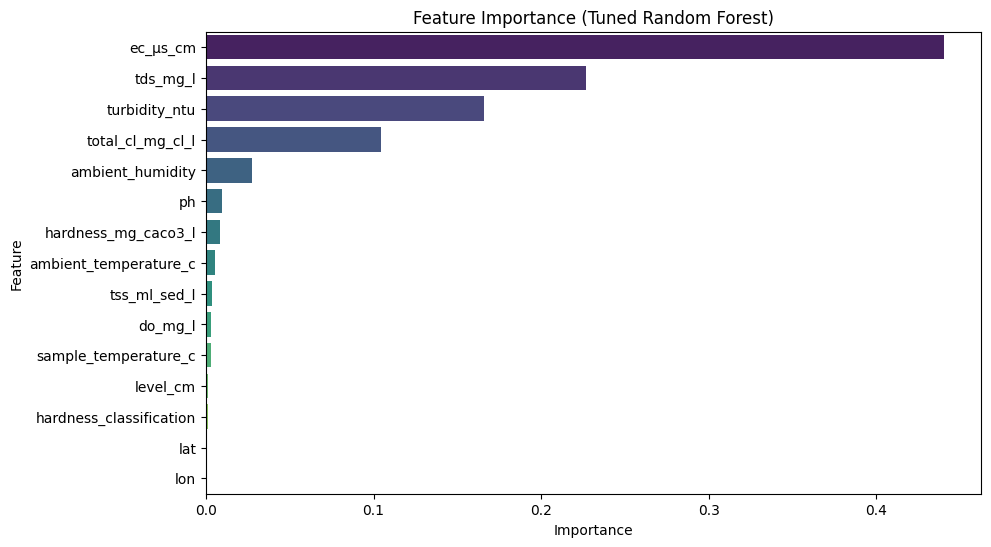

In [ ]:
importances = tuned_rf_model.feature_importances_
features = X_train.columns  # features used for training

feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance (Tuned Random Forest)")
plt.show()


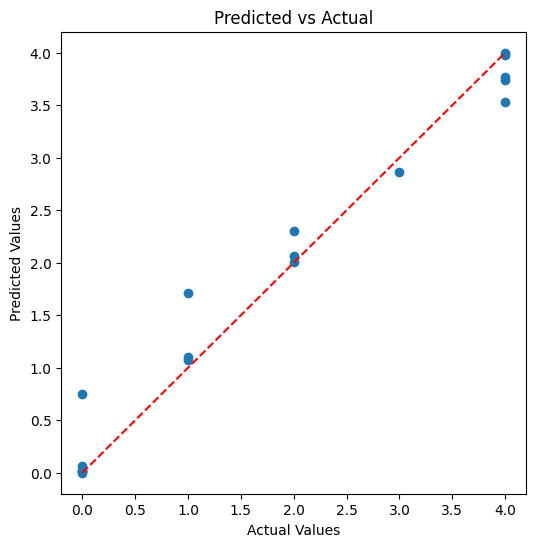

In [ ]:
y_pred = tuned_rf_model.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_dd_mm_yyyy          219 non-null    object 
 1   time_24_hrs_xx_xx        219 non-null    object 
 2   sampling_point           219 non-null    object 
 3   ambient_temperature_c    219 non-null    float64
 4   ambient_humidity         219 non-null    float64
 5   sample_temperature_c     219 non-null    float64
 6   ph                       219 non-null    float64
 7   ec_µs_cm                 219 non-null    int64  
 8   tds_mg_l                 219 non-null    int64  
 9   tss_ml_sed_l             219 non-null    float64
 10  do_mg_l                  219 non-null    float64
 11  level_cm                 219 non-null    float64
 12  turbidity_ntu            219 non-null    float64
 13  hardness_mg_caco3_l      219 non-null    float64
 14  hardness_classification  2

,date_dd_mm_yyyy,time_24_hrs_xx_xx,sampling_point,ambient_temperature_c,ambient_humidity,sample_temperature_c,ph,ec_µs_cm,tds_mg_l,tss_ml_sed_l,do_mg_l,level_cm,turbidity_ntu,hardness_mg_caco3_l,hardness_classification,total_cl_mg_cl_l,hardness_level,ph_category,turbidity_category,water_quality_overall
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,35.00,59.25,147.00,BLANDA,156.00,Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,35.00,41.20,94.00,BLANDA,78.00,Moderately Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,35.00,38.90,86.00,BLANDA,82.00,Moderately Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,35.00,30.70,200.00,SEMIDURA,117.00,Very Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,35.00,25.60,196.00,SEMIDURA,117.00,Very Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_dd_mm_yyyy          219 non-null    object 
 1   time_24_hrs_xx_xx        219 non-null    object 
 2   sampling_point           219 non-null    object 
 3   ambient_temperature_c    219 non-null    float64
 4   ambient_humidity         219 non-null    float64
 5   sample_temperature_c     219 non-null    float64
 6   ph                       219 non-null    float64
 7   ec_µs_cm                 219 non-null    int64  
 8   tds_mg_l                 219 non-null    int64  
 9   tss_ml_sed_l             219 non-null    float64
 10  do_mg_l                  219 non-null    float64
 11  level_cm                 219 non-null    float64
 12  turbidity_ntu            219 non-null    float64
 13  hardness_mg_caco3_l      219 non-null    float64
 14  hardness_classification  2

None

Missing values per column:
date_dd_mm_yyyy            0
time_24_hrs_xx_xx          0
sampling_point             0
ambient_temperature_c      0
ambient_humidity           0
sample_temperature_c       0
ph                         0
ec_µs_cm                   0
tds_mg_l                   0
tss_ml_sed_l               0
do_mg_l                    0
level_cm                   0
turbidity_ntu              0
hardness_mg_caco3_l        0
hardness_classification    0
total_cl_mg_cl_l           0
hardness_level             0
ph_category                0
turbidity_category         0
water_quality_overall      0
dtype: int64

Columns after normalization:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_qual

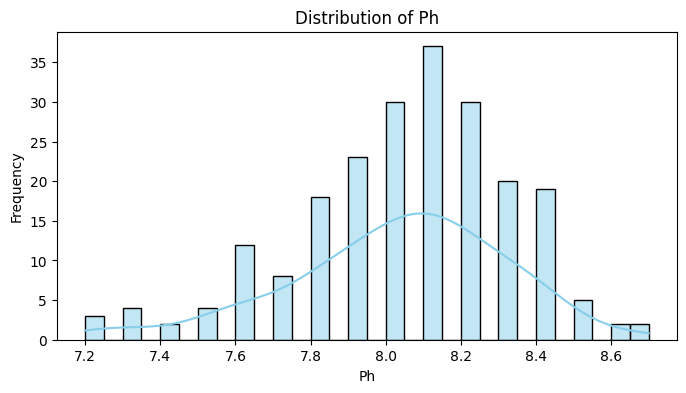

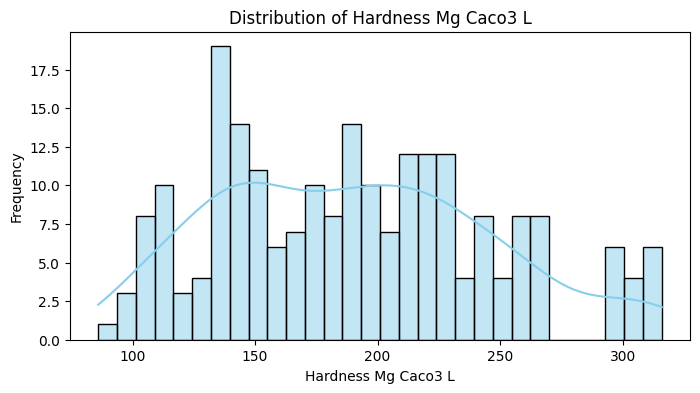

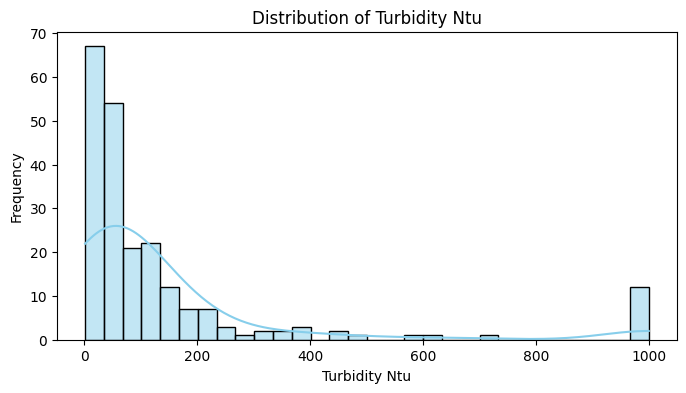

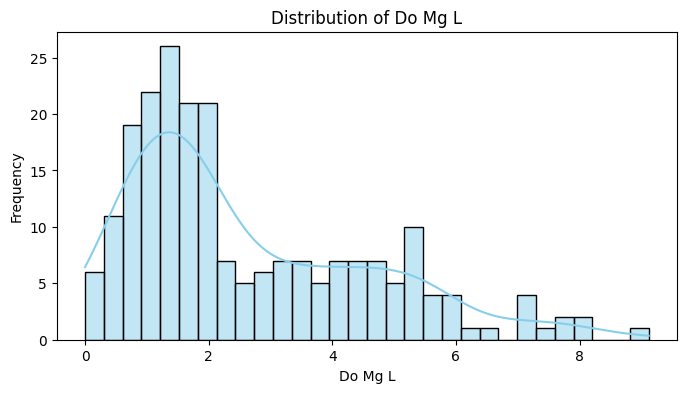

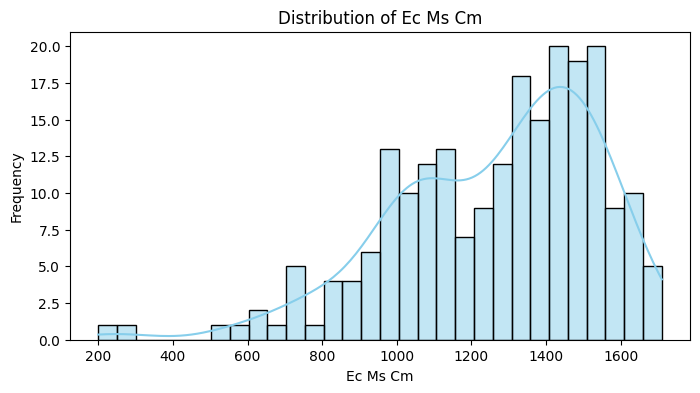

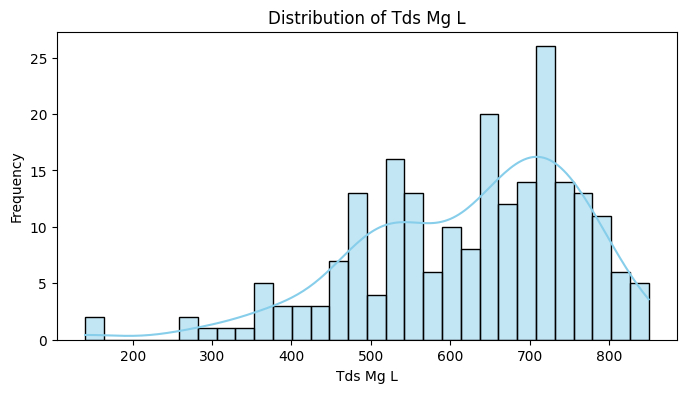

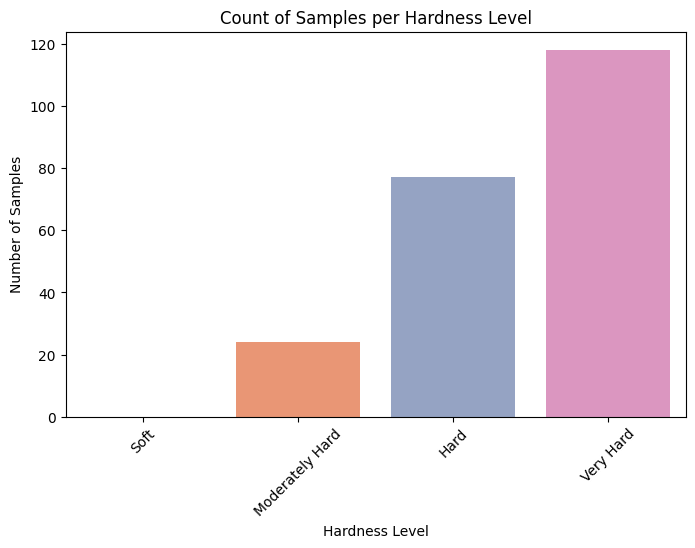

([<matplotlib.patches.Wedge at 0x227a317e570>,
 [Text(6.735557395310444e-17, 1.1, 'Soft'),
  Text(-0.371275186897477, 1.035449050216496, 'Moderately Hard'),
  Text(-1.0729200683702516, -0.24257478617608805, 'Hard'),
  Text(1.0918327736789417, -0.1337953449135985, 'Very Hard')],
 [Text(3.6739403974420595e-17, 0.6, '0.0%'),
  Text(-0.2025137383077147, 0.5647903910271795, '11.0%'),
  Text(-0.5852291282019553, -0.13231351973241165, '35.2%'),
  Text(0.5955451492794227, -0.072979279043781, '53.9%')])

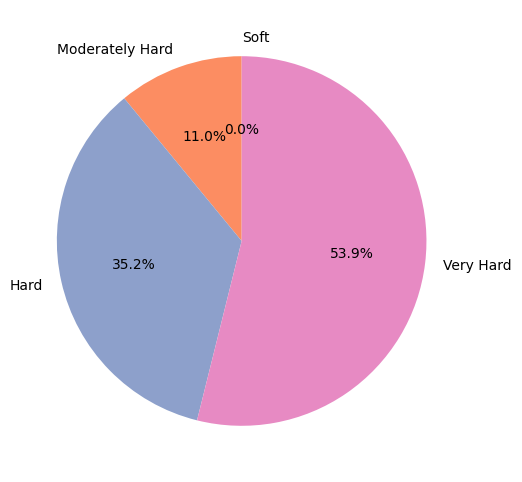

In [ ]:
# Save the final model
import joblib   
joblib.dump(best_rf, "best_water_quality_model.pkl")

df = pd.read_csv("River_water_parameters_cleaned.csv")
df.head()

"""
This dataset contains measurements of various water quality parameters collected from different river sampling points. The parameters include pH levels, hardness (measured in mg/L CaCO3), turbidity (in NTU), dissolved oxygen (DO in mg/L), electrical conductivity (EC in µS/cm), total dissolved solids (TDS in mg/L), ambient temperature (°C), ambient humidity (%), and sample temperature (°C). Each record is timestamped with the date and time of sampling.
"""
# Initial Data Exploration
df.info()
df.head()
display(df.head())
display(df.info())
df.describe(include='all').T
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())  

# Standardize Column Names
df.columns = (
    df.columns
      .str.lower()                         # lowercase
      .str.strip()                         # remove leading/trailing spaces 
        .str.replace(r"[^\w]", "_", regex=True)  # replace non-alphanumeric with underscore
        .str.replace("__+", "_", regex=True) # replace multiple underscores with single
        .str.rstrip("_")                    # remove trailing underscores
)
print("\nColumns after normalization:")
print(df.columns.tolist())

# Remove Duplicate Columns
df = df.loc[:, ~df.columns.duplicated()]
print("\nColumns after removing duplicates:")
print(df.columns.tolist())

# Handle Missing Values
# Numeric columns - fill with median
numeric_cols = ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.strip()  # Clean strings
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    median_value = df[col].median()     
    df[col] = df[col].fillna(median_value)
# Categorical columns - fill with mode  
categorical_cols = ['sampling_point']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)    

# Hardness Level    
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']   
df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],
    bins=bins,
    labels=labels,
    include_lowest=True
)   

# pH Category   
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic (Not ideal)"
    elif 6.5 <= ph <= 8.5:
        return "Neutral (Safe)"
    else:
        return "Alkaline Basic (Caution)"   
df['ph_category'] = df['ph'].apply(classify_ph)

# Turbidity Category
def classify_turbidity(turbidity):
    if turbidity <= 5:
        return "Clear (Safe)"
    elif 5 < turbidity <= 100:
        return "Moderate (Requires Treatment)"
    else:
        return "High (Poor Quality)"    
df['turbidity_category'] = df['turbidity_ntu'].apply(classify_turbidity)

# Overall Water Quality Classification
def overall_quality(row):
    if (6.5 <= row['ph'] <= 8.5) and (row['hardness_mg_caco3_l'] <= 120) and (row['turbidity_ntu'] <= 5):
        return 'Good'
    elif (row['turbidity_ntu'] > 100) or (row['hardness_mg_caco3_l'] > 200):
        return 'Poor'
    else:
        return 'Moderate'
df['water_quality_overall'] = df.apply(overall_quality, axis=1)

# Display Sample Records with Classifications
print("\nSample Records with Classifications:")
for index, row in df.head(5).iterrows():
    print(f"Record {index + 1}:")
    print(f"pH            : {row['ph']} → {row['ph_category']}")    
    print(f"Hardness      : {row['hardness_mg_caco3_l']} mg/L CaCO3 → {row['hardness_level']}")    
    print(f"Turbidity     : {row['turbidity_ntu']} NTU → {row['turbidity_category']}") 
    print(f"Overall Quality: {row['water_quality_overall']}")   
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic"
    elif 6.5 <= ph <= 8.5:
        return "Neutral"    
    else:
        return "Alkaline"   
df['ph_category'] = df['ph'].apply(classify_ph) 

# Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns
# Histograms for numeric features
numeric_features = ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {feature.replace('_',' ').title()}")
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel("Frequency")
    plt.show()  
# Count of samples per Hardness Level
hardness_counts = df['hardness_level'].value_counts().sort_index()
# Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=hardness_counts.index, y=hardness_counts.values, palette='Set2')
plt.title("Count of Samples per Hardness Level")
plt.xlabel("Hardness Level")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()  
# Pie Chart
plt.figure(figsize=(6,6))   
plt.pie(hardness_counts.values, labels=hardness_counts.index, 
        autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90) 

    

In [ ]:
# Save summary and model
comparison_df.to_csv("water_quality_comparison.csv", index=False)
joblib.dump(best_rf, "final_water_quality_model.pkl")

print("✅ Water quality comparison and model saved successfully.")

✅ Water quality comparison and model saved successfully.


Random Forest Modeling

A Random Forest classifier was trained to predict water quality classes:

Hyperparameter tuning (GridSearchCV) improved model performance.

Accuracy: 0.983 (cross-validated), indicating excellent predictive performance.

Dissolved oxygen, EC, TDS, pH had minimal impact.

Minor misclassifications occurred in underrepresented clusters, suggesting future improvements could focus on more data or additional features.


Water Quality Classification

Using hardness, pH, and turbidity thresholds:

Water was classified as Safe if all parameters were within acceptable ranges.

Requires Treatment if hardness, turbidity, or pH exceeded thresholds.

Majority of the samples fell in the Requires Treatment category due to high hardness or turbidity.


Conclusions

Random Forest is highly effective for predicting water quality in this dataset.

Hardness and turbidity are the most influential parameters.

Misclassifications are mainly in underrepresented water quality categories.

Geospatial mapping confirms model reliability and identifies key locations needing attention.


Limitations:

Small sample sizes in some clusters may have affected predictive performance.

The model currently only uses numeric features; categorical or temporal features were not incorporated.


Future Work:

Data Enhancement: Collect more samples, particularly for low-represented clusters, to improve model generalization.

Feature Engineering: Explore additional features or transformations to better separate similar clusters.

Including additional water quality parameters (e.g., microbial counts, heavy metals).

Deployment: Integrate the model into a water quality monitoring workflow for real-time predictions and decision support.

This framework ensures that the study not only demonstrates strong predictive performance but also provides actionable guidance for improving and expanding the analysis in future projects.

Deploy the tuned model as a real time water quality alert system integrated sensor data

Retrain periodically with new enviromental data

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
""""
River water parameters.csv"Data Source: [River Water Quality Dataset] – Source or repository link where the dataset was obtained.

Scikit-learn Documentation: Pedregosa et al., Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 2011. https://scikit-learn.org

Pandas Documentation: McKinney, pandas: Powerful Python Data Analysis Toolkit, 2020. https://pandas.pydata.org

Matplotlib & Seaborn Documentation: Hunter, Matplotlib: A 2D Graphics Environment, 2007; Waskom, Seaborn: Statistical Data Visualization, 2021. https://matplotlib.org
, https://seaborn.pydata.org

Random Forest Algorithm Reference: Breiman, L., Random Forests, Machine Learning, 2001.

Additional References: Any other research papers, online tutorials, or library documentation you consulted.
"""

'"\nRiver water parameters.csv"Data Source: [River Water Quality Dataset] – Source or repository link where the dataset was obtained.\n\nScikit-learn Documentation: Pedregosa et al., Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 2011. https://scikit-learn.org\n\nPandas Documentation: McKinney, pandas: Powerful Python Data Analysis Toolkit, 2020. https://pandas.pydata.org\n\nMatplotlib & Seaborn Documentation: Hunter, Matplotlib: A 2D Graphics Environment, 2007; Waskom, Seaborn: Statistical Data Visualization, 2021. https://matplotlib.org\n, https://seaborn.pydata.org\n\nRandom Forest Algorithm Reference: Breiman, L., Random Forests, Machine Learning, 2001.\n\nAdditional References: Any other research papers, online tutorials, or library documentation you consulted.\n'

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
